# Disciplina: Tópicos em Inteligência Computacional
Instituto Federal do Norte de Minas Gerais Campus Montes Claros <br/>
Curso: Ciência da Computação <br/>
Professora: Luciana Balieiro Cosme<br/>
**Aula 5: Exploração de outras bases de dados** <br/>

In [1]:
import pandas
import matplotlib.pyplot as plt

enade2016=pandas.read_csv("datasets/MICRODADOS_ENADE_2016.txt", sep=';',dtype={"DS_VT_ESC_OFG": str, 
                                                                               'DS_VT_ESC_OCE':str,
                                                                              'DS_VT_ACE_OCE':str,
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                              'NT_DIS_FG':str,
                                                                              'NT_CE':str,
                                                                              'NT_OBJ_CE':str,
                                                                              'NT_DIS_CE':str})


enade2016.shape

(216044, 141)

In [2]:
enade2016.columns[0:]

Index([u'NU_ANO', u'CO_IES', u'CO_CATEGAD', u'CO_ORGACAD', u'CO_GRUPO',
       u'CO_CURSO', u'CO_MODALIDADE', u'CO_MUNIC_CURSO', u'CO_UF_CURSO',
       u'CO_REGIAO_CURSO',
       ...
       u'QE_I59', u'QE_I60', u'QE_I61', u'QE_I62', u'QE_I63', u'QE_I64',
       u'QE_I65', u'QE_I66', u'QE_I67', u'QE_I68'],
      dtype='object', length=141)

In [3]:
'''
nota geral: 0-98 
questão08: Qual a renda total de sua família, incluindo seus rendimentos?
A = Até 1,5 salário mínimo (até R$ 1.405,50).
B = De 1,5 a 3 salários mínimos (R$ 1.405,51 a R$ 2.811,00).
C = De 3 a 4,5 salários mínimos (R$ 2.811,01 a R$ 4.216,50).
D = De 4,5 a 6 salários mínimos (R$ 4.216,51 a R$ 5.622,00).
E = De 6 a 10 salários mínimos (R$ 5. 622,01 a R$ 9.370,00).
F = De 10 a 30 salários mínimos (R$ 9.370,01 a R$ 28.110,00).
G = Acima de 30 salários mínimos (mais de R$ 28.110,00).

i05 escolaridade da mae
A = Nenhuma.
B = Ensino fundamental: 1º ao 5º ano (1ª a 4ª série).
C = Ensino fundamental: 6º ao 9º ano (5ª a 8ª série).
D = Ensino médio.
E = Ensino Superior - Graduação.
F = Pós-graduação.

'''

tabela = pandas.DataFrame(enade2016, columns=['NT_GER', 'CO_CURSO', 'QE_I08', 'CO_IES', 'QE_I05', 'QE_I17', 'CO_REGIAO_CURSO'])

In [4]:
##limpeza dos dados

#substitui vírgula por ponto
tabela['NT_GER'] = tabela['NT_GER'].str.replace(',', '.')

#observe os NaN (not a number)

In [5]:
'''No arquivo 'Dicionário de variáveis dos Microdados do Enade_Edição 2017' descreve que:
o codigo 222 no campo TP_PR_GER significa ausente 
556 e 888 são participações desconsideradas.
Portanto, algumas notas podem ser desconsideradas dependendo do seu objetivo, 
e aqui, será de calcular a média daqueles que fizeram a prova.
'''
tabela=tabela.loc[(tabela['NT_GER'].notnull())]
#print(tabela['NT_GER'])
#converte de str para float
tabela['NT_GER'] = pandas.to_numeric(tabela['NT_GER'])



In [6]:
#Calcula a média de um curso especifico
#Código da área de enquadramento do curso no Enade == ciencia da computacao

#ccomp = tabela[tabela['CO_CURSO']==]

In [7]:
import matplotlib.pyplot as plt


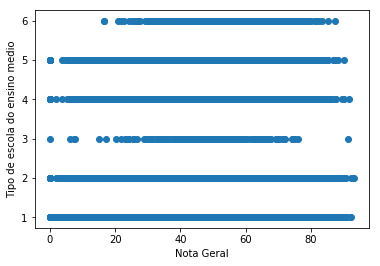

In [8]:
# Verificar o impacto do ensino médio no ensino superior
"""
A = Todo em escola pública.
B = Todo em escola privada (particular).
C = Todo no exterior.
D = A maior parte em escola pública.
E = A maior parte em escola privada (particular).
F = Parte no Brasil e parte no exterior.
"""
#escola = tabela['QE_I17'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5, 'F':6})
#print(escola)
tabela['QE_I17'] = tabela['QE_I17'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5, 'F':6})
tabela=tabela.loc[(tabela['QE_I17'].notnull())]
plt.scatter( tabela.NT_GER, tabela.QE_I17 )
plt.xlabel('Nota Geral')
plt.ylabel('Tipo de escola do ensino medio')
plt.show()

In [9]:
tabela['NT_GER'].groupby(tabela['QE_I17']).describe()

,count,mean,std,min,25%,50%,75%,max
QE_I17,,,,,,,,
1.0,121442.0,44.770802,14.381532,0.0,34.4,44.3,54.800,92.2
2.0,53381.0,53.441058,14.891021,0.0,43.1,54.3,64.800,93.2
3.0,173.0,48.810405,15.329482,0.0,39.4,49.8,58.700,91.3
4.0,11420.0,43.404466,14.294710,0.0,33.0,42.7,53.300,91.5
5.0,8691.0,46.617386,14.607059,0.0,36.1,46.4,57.200,90.1
6.0,360.0,58.068889,14.380832,16.5,48.2,59.7,69.525,87.3


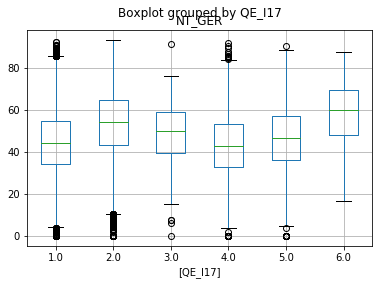

In [10]:
qe09 = pandas.DataFrame(tabela, columns=['NT_GER', 'QE_I17'])
qe09.boxplot(by='QE_I17')

(0.9970256686210632, 3.643576392924923e-39)
(0.9900397658348083, 0.0)


/usr/lib/python2.7/dist-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


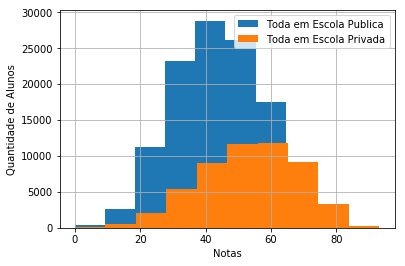

In [11]:
import scipy.stats as stats

print(stats.shapiro(qe09.NT_GER.loc[qe09.QE_I17 == 1]))

print(stats.shapiro(qe09.NT_GER.loc[qe09.QE_I17 == 2]))

#a saída do teste é o valor W e o p-value
#Considera-se que a suposição não é violada quando o p-value é maior que alpha, normalmente 0.05

#pelo histograma, também é possível observar a distribuição dos dados. 
qe09.NT_GER.loc[qe09.QE_I17 ==1].hist(label="Toda em Escola Publica")
qe09.NT_GER.loc[qe09.QE_I17 ==2].hist(label="Toda em Escola Privada")
plt.xlabel("Notas")
plt.ylabel("Quantidade de Alunos")
plt.legend()

In [12]:
#escolas = tabela[tabela['CO_GRUPO']==4004]

escolas['QE_I17'] = escolas['QE_I17'].map({'A': 1, 'B': 2, 'C': 3, 'D': 1,'E': 2, 'F':3})
escolas=escolas.loc[(escolas['QE_I17'].notnull())]
plt.scatter( escolas.NT_GER, escolas.QE_I17 )
plt.xlabel('Nota Geral')
plt.ylabel('Tipo de escola do ensino medio')
plt.show()

escolas['NT_GER'].groupby(escolas['QE_I17']).describe()

NameError: name 'escolas' is not defined

In [ ]:
qe08 = pandas.DataFrame(escolas, columns=['NT_GER', 'QE_I17'])
qe08.boxplot(by='QE_I17')

In [ ]:
print(stats.shapiro(qe08.NT_GER.loc[qe08.QE_I17 == 1]))
print(stats.shapiro(qe08.NT_GER.loc[qe08.QE_I17 == 2]))
qe08.NT_GER.loc[qe08.QE_I17 ==1].hist(label="Toda e Maior Parte Publica")
qe08.NT_GER.loc[qe08.QE_I17 ==2].hist(label="Toda e Maior Parte Privada")
plt.xlabel("Notas")
plt.ylabel("Quantidade de Alunos")
plt.legend()

In [ ]:
# Verificar os resultados a partir da região do país
"""
1 Norte
2 Nordeste
3 Sudeste
4 Sul
5 Centro-Oeste
"""
#escola = tabela['QE_I17'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5, 'F':6})
#print(escola)
#tabela['CO_REGIAO_CURSO'] = tabela['CO_REGIAO_CURSO'].map({1 : 'N', 2 : 'NE', 3 : 'SE', 4 : 'S', 5 : 'CO'})
tabela=tabela.loc[(tabela['CO_REGIAO_CURSO'].notnull())]
plt.scatter( tabela.NT_GER, tabela.CO_REGIAO_CURSO )
plt.xlabel('Nota Geral')
plt.ylabel('Regiao Curso')
plt.show()
#nota geral agrupada pela questão 05
tabela['NT_GER'].groupby(tabela['CO_REGIAO_CURSO']).describe()



In [ ]:
#nota geral agrupada pela questão 05
#tabela['CO_REGIAO_CURSO'] = tabela['CO_REGIAO_CURSO'].map({1 : 'N', 2 : 'NE', 3 : 'SE', 4 : 'S', 5 : 'CO'})
tabela['NT_GER'].groupby(tabela['CO_REGIAO_CURSO']).describe()

In [ ]:
#Como verificar se a média dos alunos do campo QE_I05 para todos os alunos são realmente diferentes
qe05 = pandas.DataFrame(ccomp, columns=['NT_GER', 'CO_REGIAO_CURSO'])
qe05.boxplot(by='CO_REGIAO_CURSO')

In [ ]:
#print(stats.shapiro(qe05.NT_GER.loc[qe05.CO_REGIAO_CURSO == 'N']))

#print(stats.shapiro(qe05.NT_GER.loc[qe05.CO_REGIAO_CURSO == 'S']))

#a saída do teste é o valor W e o p-value
#Considera-se que a suposição não é violada quando o p-value é maior que alpha, normalmente 0.05

#pelo histograma, também é possível observar a distribuição dos dados. 
#qe05.NT_GER.loc[qe05.CO_REGIAO_CURSO =='S'].hist(label="Sul")
#qe05.NT_GER.loc[qe05.CO_REGIAO_CURSO =='N'].hist(label="Norte")
#plt.xlabel("Notas")
#plt.ylabel("Quantidade de Alunos")
#plt.legend()